# Data Analysis

## 1. Data Loading

### 1.1 LineUp Data 2022/23

Data Loading
- lineups_2022_2023_1.csv
- lineups_2022_2023_2.csv

In [2]:
import pandas as pd

# Load the datasets
lineups_1 = pd.read_csv('./data/lineups_2022_2023_1.csv')
lineups_2 = pd.read_csv('./data/lineups_2022_2023_2.csv')

lineups_1.head(), lineups_2.head()


(      Position               Player  Age Market Value            Club  \
 0   Goalkeeper   David von Ballmoos   27       €2.50m  BSC Young Boys   
 1  Centre-Back       Cédric Zesiger   24       €3.20m  BSC Young Boys   
 2  Centre-Back  Fabian Lustenberger   34        €400k  BSC Young Boys   
 3    Left-Back       Ulisses Garcia   26       €2.00m  BSC Young Boys   
 4   Right-Back           Lewin Blum   20        €750k  BSC Young Boys   
 
                                    Gameday   H/A    Status  Match ID  
 0  1. Matchday | Sat, 7/16/22   |  6:00 PM  Home  Starting   3840895  
 1  1. Matchday | Sat, 7/16/22   |  6:00 PM  Home  Starting   3840895  
 2  1. Matchday | Sat, 7/16/22   |  6:00 PM  Home  Starting   3840895  
 3  1. Matchday | Sat, 7/16/22   |  6:00 PM  Home  Starting   3840895  
 4  1. Matchday | Sat, 7/16/22   |  6:00 PM  Home  Starting   3840895  ,
              Position         Player  Age Market Value           Club  \
 0          Goalkeeper    Marwin Hitz   35     

In [3]:
# Concatenate the datasets
lineups = pd.concat([lineups_1, lineups_2], axis=0)

# safe as csv in the data folder
lineups.to_csv('./data/lineups_2022_2023_merged.csv', index=False)

lineups.sample(5)

,Position,Player,Age,Market Value,Club,Gameday,H/A,Status,Match ID
274,Defensive Midfield,Gezim Pepsi,24,€200k,FC Winterthur,"2. Matchday | Sat, 7/23/22 | 8:30 PM",Away,Substitute,3840901
6952,Centre-Forward,Joël Monteiro,23,€700k,BSC Young Boys,"28. Matchday | Sun, 4/16/23 | 4:30 PM",Away,Substitute,3841098
310,Centre-Forward,Chris Bedia,26,€1.10m,Servette FC,"2. Matchday | Sun, 7/24/22 | 2:15 PM",Away,Starting,3840902
873,midfield,Jean-Pierre Giordani,26,NaN,Sporting Étoile Club Bastia,"20. Matchday | Sun, 1/7/73 | 8:00 PM",Home,Starting,3841175
6054,Central Midfield,Lorik Emini,23,€500k,FC Luzern,"24. Matchday | Sun, 3/12/23 | 2:15 PM",Away,Substitute,3841071


Check N/A's

In [4]:
# check for missing values
missing_values = lineups.isnull().sum()

missing_values

Position           0
Player             0
Age                0
Market Value    2779
Club               0
Gameday            0
H/A                0
Status             0
Match ID           0
dtype: int64

For the LineUp of each match in season 2022/2023 wo only have missing values in the column `Market Value`, which is not further suprising

In [5]:
# look at different values in the 'Club' column
lineups['Club'].value_counts()

Club
FC St. Gallen 1879              718
FC Basel 1893                   717
Servette FC                     717
BSC Young Boys                  716
FC Zürich                       716
FC Sion                         716
FC Winterthur                   713
Grasshopper Club Zurich         712
FC Luzern                       711
FC Lugano                       697
CF Barcelona                    176
Nîmes Olympique                 118
FC Girondins Bordeaux           117
Angers SCO                      117
Red Star FC                     117
AC Ajaccio                      116
Stade Rennais FC                116
Olympique Marseille             116
FC Sochaux-Montbéliard          116
Sporting Étoile Club Bastia     116
Paris FC                        116
AS Saint-Étienne                115
US Valenciennes-Anzin           115
CS Sedan-Ardennes               115
FC Nantes                       114
RC Strasbourg Alsace            114
Stade Reims                     113
FC Metz                

In order to only have a look at Swiss Clubs for a first step, we need to filter them.

In [6]:
# dictionary for values in 'Clubs' we want to keep
clubs_to_keep = {
    'FC St. Gallen 1879': 'FC St. Gallen 1879',
    'FC Basel 1893': 'FC Basel 1893',
    'Servette FC': 'Servette FC',
    'BSC Young Boys': 'BSC Young Boys',
    'FC Zürich': 'FC Zürich',
    'FC Sion': 'FC Sion',
    'FC Winterthur': 'FC Winterthur',
    'Grasshopper Club Zurich': 'Grasshopper Club Zurich',
    'FC Luzern': 'FC Luzern',
    'FC Lugano': 'FC Lugano'
}

# filter the dataset
lineups_SL = lineups[lineups['Club'].isin(clubs_to_keep.keys())]

print(lineups_SL['Club'].value_counts())
print("*"*50)
print("Max. Players on LineUp Sheet per Match: 20")
print("Max. Players on LineUp Sheet per Season: 20 * 36 = 720")

Club
FC St. Gallen 1879         718
FC Basel 1893              717
Servette FC                717
BSC Young Boys             716
FC Zürich                  716
FC Sion                    716
FC Winterthur              713
Grasshopper Club Zurich    712
FC Luzern                  711
FC Lugano                  697
Name: count, dtype: int64
**************************************************
Max. Players on LineUp Sheet per Match: 20
Max. Players on LineUp Sheet per Season: 20 * 36 = 720


Suprisingly, Lugano has a low number of player in the lineups of that season. After a quick look at the data, it is shown that in 17 of the 36 (i.e. ~50%!) matches Lugano had less than the maximum of 20 players on the match lineup.

In [7]:
lineups_SL.sample(10)

,Position,Player,Age,Market Value,Club,Gameday,H/A,Status,Match ID
3463,Centre-Forward,Giovanni Sio,33,€300k,FC Sion,"15. Matchday | Sun, 11/6/22 | 4:30 PM",Away,Substitute,3840993
6236,Centre-Back,Riccardo Calafiori,20,€3.50m,FC Basel 1893,"25. Matchday | Sun, 3/19/23 | 4:30 PM",Away,Starting,3841076
1513,Left-Back,Noah Katterbach,21,€1.70m,FC Basel 1893,"8. Matchday | Sun, 9/11/22 | 4:30 PM",Home,Starting,3840933
3720,Centre-Forward,Boris Babic,25,€400k,FC Lugano,"16. Matchday | Sun, 11/13/22 | 4:30 PM",Home,Substitute,3841000
2697,Left-Back,Reto Ziegler,36,€100k,FC Lugano,"12. Matchday | Wed, 10/19/22 | 8:30 PM",Home,Starting,3840970
801,Goalkeeper,André Moreira,27,€1.20m,Grasshopper Club Zurich,"34. Matchday | Sun, 5/21/23 | 4:30 PM",Away,Starting,3841172
3641,Centre-Forward,Sang-bin Jeong,20,€850k,Grasshopper Club Zurich,"16. Matchday | Sat, 11/12/22 | 8:30 PM",Home,Substitute,3840998
5624,Centre-Back,Dimitri Cavaré,28,€700k,FC Sion,"22. Matchday | Sat, 2/25/23 | 6:00 PM",Home,Starting,3841061
6105,Right Midfield,Roman Macek,25,€300k,FC Lugano,"25. Matchday | Sun, 3/19/23 | 4:30 PM",Home,Starting,3841073
5041,Centre-Forward,Willem Geubbels,21,€2.50m,FC St. Gallen 1879,"20. Matchday | Sun, 2/12/23 | 4:30 PM",Away,Substitute,3841041


In [57]:
# safe as csv in the data folder
#lineups_SL.to_csv('./data/lineups_2022_2023_SL.csv', index=False)

### 1.2 Match Event Data 2022/23

Data Loading
- match_events_2022_2023_1.csv
- match_events_2022_2023_2.csv

In [8]:
## TODO plausibilitätsprüfung

In [9]:
# Load the datasets
events_1 = pd.read_csv('./data/match_events_2022_2023_1.csv')
events_2 = pd.read_csv('./data/match_events_2022_2023_2.csv')

events_1.head(), events_2.head()

(             Club   H/A Timestamp         Event         Player Event  \
 0  BSC Young Boys  Home       62'          Goal  Christian Fassnacht   
 1  BSC Young Boys  Home       77'          Goal         Cedric Itten   
 2  BSC Young Boys  Home       81'          Goal        Fabian Rieder   
 3  BSC Young Boys  Home       85'          Goal       Wilfried Kanga   
 4  BSC Young Boys  Home       63'  Substitution         Cedric Itten   
 
         Remark Event        Player Assist     Player Out  Match ID  
 0             Header       Ulisses Garcia            NaN   3840895  
 1  Right-footed shot        Cheikh Niasse            NaN   3840895  
 2             Header       Wilfried Kanga            NaN   3840895  
 3  Right-footed shot  Christian Fassnacht            NaN   3840895  
 4           Tactical                  NaN  Meschack Elia   3840895  ,
             Club   H/A Timestamp         Event         Player Event  \
 0      FC Zürich  Away       90'          Goal           Roko Simi

In [10]:
# Concatenate the datasets
events = pd.concat([events_1, events_2], axis=0)

# safe as csv in the data folder
events.to_csv('./data/match_events_2022_2023_merged.csv', index=False)

events.sample(5)

,Club,H/A,Timestamp,Event,Player Event,Remark Event,Player Assist,Player Out,Match ID
1385,BSC Young Boys,Away,64',Substitution,Anthony Racioppi,Injury,NaN,David von Ballmoos,3840996
427,FC Luzern,Home,42',Yellow-Red Card,Martin Frydek,Foul,NaN,NaN,3840920
884,FC Luzern,Away,70',Substitution,Jakub Kadák,Tactical,NaN,Nicky Beloko,3840959
2320,FC Basel 1893,Away,81',Substitution,Anton Kade,Tactical,NaN,Dan Ndoye,3841076
2314,FC Basel 1893,Away,14',Substitution,Bradley Fink,Injury,NaN,Andi Zeqiri,3841076


Check N/A's

In [11]:
# check for missing values
missing_values_e = events.isnull().sum()

missing_values_e

Club                0
H/A                 0
Timestamp           0
Event               0
Player Event        1
Remark Event        0
Player Assist    3110
Player Out       1836
Match ID            0
dtype: int64

In [12]:
# show record with missing value in 'Player Event' column
events[events['Player Event'].isnull()]

,Club,H/A,Timestamp,Event,Player Event,Remark Event,Player Assist,Player Out,Match ID
1320,Elche CF,Home,54',Substitution,NaN,Injury,NaN,Chancho,3840990


The only record with a missing value regarding the Player Event can be ignored since we only focus on the Swiss Teams.

In [13]:
# look at different values in the 'Club' column
events['Club'].value_counts()


Club
BSC Young Boys                  327
FC St. Gallen 1879              327
FC Lugano                       321
Grasshopper Club Zurich         320
FC Zürich                       306
FC Sion                         302
FC Winterthur                   300
Servette FC                     297
FC Basel 1893                   296
FC Luzern                       296
CF Barcelona                     29
Olympique Marseille              28
FC Nantes                        27
AS Saint-Étienne                 25
Sporting Étoile Club Bastia      25
Nîmes Olympique                  22
OGC Nice                         22
FC Girondins Bordeaux            22
Paris FC                         20
US Valenciennes-Anzin            20
AS Nancy-Lorraine                19
CS Sedan-Ardennes                18
RC Strasbourg Alsace             18
Stade Rennais FC                 17
Stade Reims                      17
Angers SCO                       17
Olympique Lyon                   16
Red Star FC            

In [14]:
# filter the dataset
events_SL = events[events['Club'].isin(clubs_to_keep.keys())]

events_SL['Club'].value_counts()

Club
BSC Young Boys             327
FC St. Gallen 1879         327
FC Lugano                  321
Grasshopper Club Zurich    320
FC Zürich                  306
FC Sion                    302
FC Winterthur              300
Servette FC                297
FC Basel 1893              296
FC Luzern                  296
Name: count, dtype: int64

In [15]:
events_SL.sample(10)

,Club,H/A,Timestamp,Event,Player Event,Remark Event,Player Assist,Player Out,Match ID
1478,FC Luzern,Away,46',Substitution,Pascal Schürpf,Tactical,NaN,Asumah Abubakar,3841001
1253,FC Sion,Home,90',Yellow Card,Gaëtan Karlen,Foul,NaN,NaN,3840980
522,FC Sion,Home,79',Substitution,Giovanni Sio,Tactical,NaN,Itaitinga,3840925
643,FC Luzern,Away,85',Goal,Christian Gentner,Right-footed shot,Sofyan Chader,NaN,3840932
2259,BSC Young Boys,Home,49',Yellow Card,Lewin Blum,Foul,NaN,NaN,3841072
321,FC Lugano,Home,62',Substitution,Mohamed Amoura,Tactical,NaN,Zan Celar,3840914
70,Grasshopper Club Zurich,Away,60',Substitution,Christian Herc,Tactical,NaN,Amir Abrashi,3840899
521,FC Basel 1893,Away,79',Substitution,Jean-Kévin Augustin,Tactical,NaN,Wouter Burger,3840925
141,FC Luzern,Away,81',Substitution,Mihailo Stevanovic,Tactical,NaN,Nicky Beloko,3841163
1831,FC Basel 1893,Home,90',Substitution,Kaly Sène,Delay,NaN,Zeki Amdouni,3841038


In [56]:
# safe as csv in the data folder
#events_SL.to_csv('./data/match_events_2022_2023_SL.csv', index=False)

### 1.3 Match Info 2022/23

Data Loading
- match_info_1.csv
- match_info_2.csv

In [18]:
# Load the datasets
minfo_1 = pd.read_csv('./data/matches_info_1.csv')
minfo_2 = pd.read_csv('./data/matches_info_2.csv')

minfo_1.head(), minfo_2.head()

(   Match ID       Home Team                Away Team        Result  \
 0   3840895  BSC Young Boys                FC Zürich  4:0\r\n(0:0)   
 1   3840896   FC Winterthur            FC Basel 1893  1:1\r\n(1:0)   
 2   3840897       FC Lugano                  FC Sion  2:3\r\n(0:1)   
 3   3840898     Servette FC       FC St. Gallen 1879  1:0\r\n(1:0)   
 4   3840899       FC Luzern  Grasshopper Club Zurich  1:1\r\n(1:1)   
 
                        League  
 0  Credit Suisse Super League  
 1  Credit Suisse Super League  
 2  Credit Suisse Super League  
 3  Credit Suisse Super League  
 4  Credit Suisse Super League  ,
    Match ID                Home Team       Away Team        Result  \
 0   3841148            FC Basel 1893       FC Zürich  0:2\r\n(0:0)   
 1   3841149  Grasshopper Club Zurich     Servette FC  2:3\r\n(1:1)   
 2   3841150                FC Luzern       FC Lugano  2:2\r\n(2:0)   
 3   3841151                  FC Sion   FC Winterthur  0:1\r\n(0:1)   
 4   3841152      

In [24]:
# Concatenate the datasets
m_info = pd.concat([minfo_1, minfo_2], axis=0)

# safe as csv in the data folder
m_info.to_csv('./data/matches_info_merged.csv', index=False)

m_info.sample(5)

,Match ID,Home Team,Away Team,Result,League
103,3840998,Grasshopper Club Zurich,FC Basel 1893,1:0\r\n(1:0),Credit Suisse Super League
143,3841038,FC Basel 1893,FC Sion,3:1\r\n(1:1),Credit Suisse Super League
207,3841102,FC St. Gallen 1879,FC Winterthur,2:3\r\n(2:3),Credit Suisse Super League
24,3841172,FC Zürich,Grasshopper Club Zurich,2:1\r\n(1:1),Credit Suisse Super League
20,3840915,FC Sion,Grasshopper Club Zurich,2:2\r\n(1:0),Credit Suisse Super League


Data Cleaning & Enrichment

In [25]:
# check for missing values
missing_values_m = m_info.isnull().sum()

missing_values_m

Match ID     0
Home Team    0
Away Team    0
Result       0
League       0
dtype: int64

In [29]:
m_info.shape

(298, 5)

In [35]:
#pd.set_option('display.max_rows', None)
#m_info

In [34]:
# getting rid of the '\r\n' in the result column
m_info['Result'] = m_info['Result'].str.replace('\r\n', ' ')

m_info.sample(5)

,Match ID,Home Team,Away Team,Result,League
172,3841067,FC Zürich,Servette FC,1:1 (0:0),Credit Suisse Super League
60,3840955,US Valenciennes-Anzin,Stade Reims,1:2 (0:1),Division 1
10,3841158,FC Nantes,Red Star FC,3:1 (2:1),Division 1
145,3841040,Servette FC,Grasshopper Club Zurich,2:1 (1:0),Credit Suisse Super League
13,3841161,AS Saint-Étienne,Angers SCO,5:0 (4:0),Division 1


In [50]:
# drop the columns HomeTeamPoints	AwayTeamPoints	
m_info = m_info.drop(['HomeTeamPoints', 'AwayTeamPoints'], axis=1)

In [51]:
# adding new columns for the points the home and away team got in the match
## if the club won the match, they get 3 points, if they lost, they get 0 points, if they drew, they get 1 point
## relevant result is the first 3 characters of the 'Result' column (the last 5 characters is the half-time result, which is not relevant for this task)
m_info.insert(2, 'HomeTeamPoints', m_info['Result'].str[:3].apply(lambda x: 3 if x[0] > x[2] else 1 if x[0] == x[2] else 0))
m_info.insert(3, 'AwayTeamPoints', m_info['Result'].str[:3].apply(lambda x: 3 if x[0] < x[2] else 1 if x[0] == x[2] else 0))


In [52]:
m_info.sample(5)

,Match ID,Home Team,HomeTeamPoints,AwayTeamPoints,Away Team,Result,League
62,3841210,FC St. Gallen 1879,3,0,FC Sion,4:0 (3:0),Credit Suisse Super League
90,3840985,Valencia CF,1,1,CF Barcelona,2:2 (2:2),Copa del Generalísimo
21,3841169,FC Luzern,1,1,FC St. Gallen 1879,1:1 (1:1),Credit Suisse Super League
61,3840956,CS Sedan-Ardennes,1,1,RC Strasbourg Alsace,0:0 (0:0),Division 1
193,3841088,Paris FC,0,3,Angers SCO,1:2 (0:1),Division 1


With these new columns `HomeTeamPoints` and `AwayTeamPoint` we are now able to quantify the 'success' of a team based on the result

In [53]:
# filter the dataset
# only keep the matches where the column 'Home Team' is in the dictionary 'clubs_to_keep'
m_info_SL = m_info[m_info['Home Team'].isin(clubs_to_keep.keys())]

m_info_SL['Home Team'].value_counts()

Home Team
BSC Young Boys             18
FC Winterthur              18
FC Lugano                  18
Servette FC                18
FC Luzern                  18
FC Zürich                  18
FC St. Gallen 1879         18
FC Basel 1893              18
Grasshopper Club Zurich    18
FC Sion                    18
Name: count, dtype: int64

In [54]:
m_info_SL.sample(5)

,Match ID,Home Team,HomeTeamPoints,AwayTeamPoints,Away Team,Result,League
72,3840967,FC Zürich,1,1,BSC Young Boys,0:0 (0:0),Credit Suisse Super League
115,3841010,Servette FC,1,1,FC Sion,2:2 (2:0),Credit Suisse Super League
231,3841126,BSC Young Boys,3,0,FC Luzern,5:1 (3:1),Credit Suisse Super League
8,3840903,Grasshopper Club Zurich,3,0,FC Lugano,2:1 (1:0),Credit Suisse Super League
117,3841012,FC Zürich,3,0,FC St. Gallen 1879,1:0 (0:0),Credit Suisse Super League


In [55]:
#safe as csv in the data folder
#m_info_SL.to_csv('./data/matches_info_SL.csv', index=False)

## 2. Determining a Stability Index (SI)

#### Definition and Rationale:
The Stability Index (SI) aims to quantify the consistency and reliability of a soccer team's lineup and performance across a season. A stable team typically exhibits fewer changes in its starting lineup, consistent performance in terms of match outcomes, and disciplined on-field behavior.

#### Criteria for Stability Index:
- **Lineup Consistency (LC)**: Measures how consistently the same players are starting matches. A lower number of different starters indicates a more stable lineup.
- **Performance Consistency (PC)**: Evaluates the consistency in match outcomes (win, draw, loss). A team that has less fluctuation in match results can be considered more stable in performance.
- **Disciplinary Record (DR)**: Assesses the number of disciplinary actions (yellow cards, red cards) a team receives. A team with fewer disciplinary actions is deemed more stable in terms of on-field behavior.

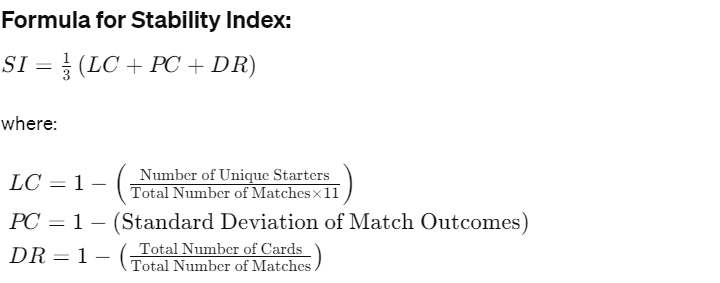

#### Assumptions:
- The maximum number of starting players in a match is 11.
- Match outcomes are quantified as 3 points for a win, 1 point for a draw, and 0 points for a loss.
- Yellow cards count as 1, red cards as 2.

#### Explanation:
- **Lineup Consistency (LC)**: We normalize the number of unique starters by the total possible number of starting positions across all matches (Total Number of Matches × 11). A team that uses all its players equally would have an LC of 0, while a team that always uses the same starting lineup would have an LC close to 1.

- **Performance Consistency (PC)**: We use the standard deviation of match outcomes to evaluate performance consistency. A lower standard deviation indicates that the team's performance (win/draw/loss) is more consistent.

- **Disciplinary Record (DR)**: This metric is normalized by the number of matches to account for teams playing different numbers of matches (due to potential match cancellations or other reasons). A DR close to 1 indicates a team has very few cards per match, reflecting a stable disciplinary record.


### 2.1 LineUp Consistency (LC)

Steps to Calculate LC:

1. From the lineups_SL dataset, count the number of unique starters for each team. A "starter" is a player listed in the starting lineup.
2. Count the total number of matches for each team. Multiply this by 11 to get the total possible number of starting positions across all matches.
3. Calculate the LC for each team using the formula LC = 1 - (Number of Unique Starters / (Total Number of Matches × 11)). --> normalization

This will give us a measure of how often the team changes its starting lineup. A higher LC value indicates a more consistent starting lineup, whereas a lower value indicates more variation in the starting players throughout the season.

In [67]:
# Step 1: Count the number of unique starters for each team
unique_starters = lineups_SL[lineups_SL['Status'] == 'Starting'].groupby('Club')['Player'].nunique()

# Step 2: Count the total number of matches for each team for parameter LC
total_matches = pd.concat([m_info_SL['Home Team'], m_info_SL['Away Team']]).value_counts() #LC (overall)
total_home_matches = m_info_SL['Home Team'].value_counts() #subparameter LC Home
total_away_matches = m_info_SL['Away Team'].value_counts() #subparameter LC Away

# Step 3: Calculate the LC for each team -> normalization [0, 1]
LC = 1 - (unique_starters / (total_matches * 11)) #LC (overall)
LC_home = 1 - (unique_starters / (total_home_matches * 11)) #subparameter LC Home
LC_away = 1 - (unique_starters / (total_away_matches * 11)) #subparameter LC Away


In [109]:
# Create a DataFrame to hold all LC values
LC_values = pd.DataFrame({
    'LC': LC,
    'LC Home': LC_home,
    'LC Away': LC_away
})

# Display the DataFrame with all LC values
LC_values = LC_values.sort_values(by='LC', ascending=False)
LC_values

,LC,LC Home,LC Away
FC St. Gallen 1879,0.936869,0.873737,0.873737
Grasshopper Club Zurich,0.936869,0.873737,0.873737
Servette FC,0.936869,0.873737,0.873737
FC Lugano,0.934343,0.868687,0.868687
FC Winterthur,0.934343,0.868687,0.868687
FC Sion,0.931818,0.863636,0.863636
BSC Young Boys,0.929293,0.858586,0.858586
FC Zürich,0.929293,0.858586,0.858586
FC Basel 1893,0.926768,0.853535,0.853535
FC Luzern,0.926768,0.853535,0.853535


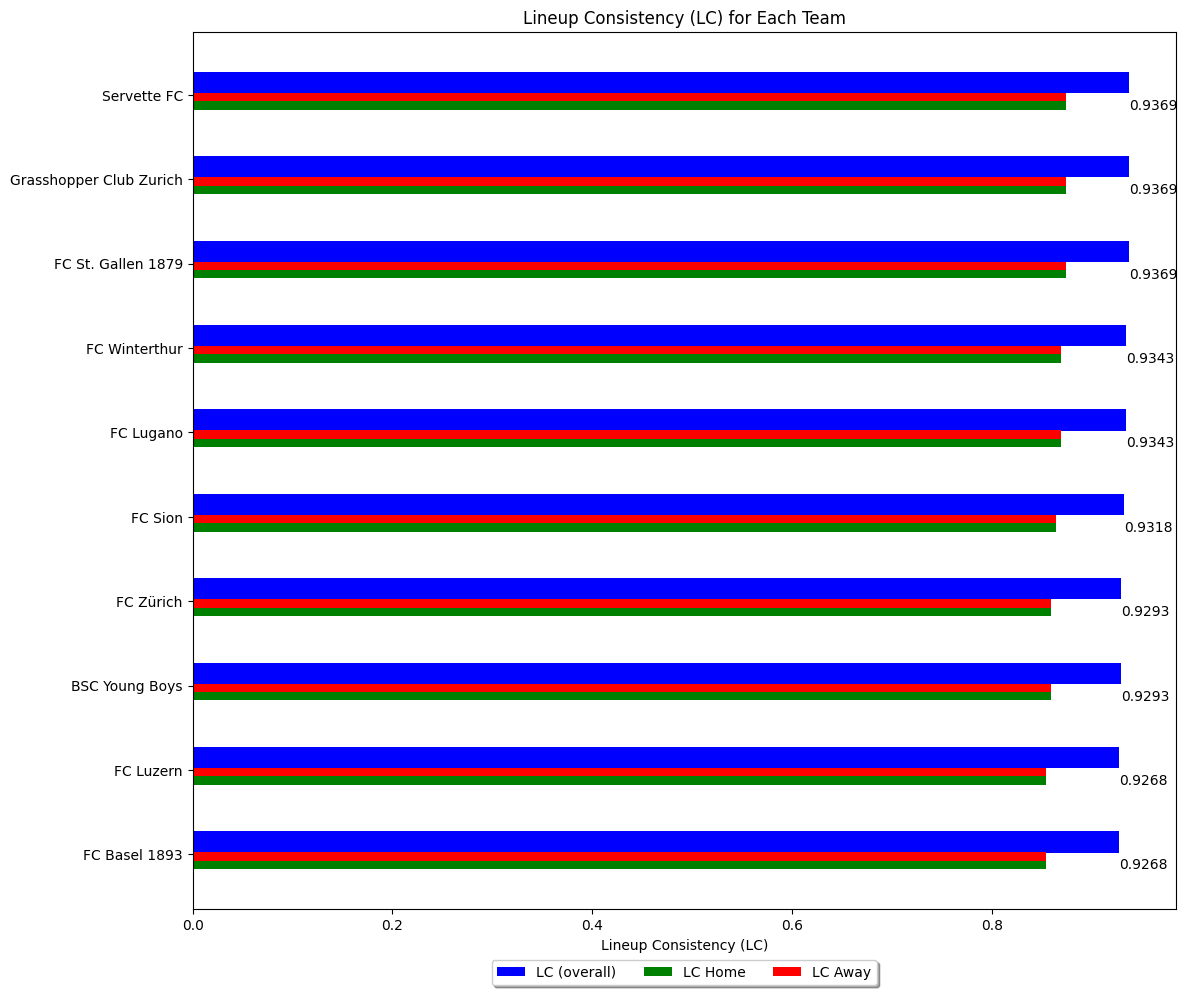

In [106]:
import matplotlib.pyplot as plt
import numpy as np

# concatenate LC, LC_home, and LC_away into 1 DataFrame
LC_values = pd.concat([LC, LC_home, LC_away], axis=1)
LC_values.columns = ['LC', 'LC Home', 'LC Away']


# Adjusting the column names to match the DataFrame for the bar chart plotting
LC_sorted.columns = ['LC_overall', 'LC_Home', 'LC_Away']
LC_sorted = LC_sorted.sort_values(by='LC_overall', ascending=True)

# Plotting the bar chart according to the specified requirements
fig, ax = plt.subplots(figsize=(12, 10))

# Set the positions of the bars
indices = np.arange(len(LC_sorted))
blue_bar_width = 0.25  # thicker width for the blue bar
green_red_bar_width = 0.1  # width for the green and red bars

# Plot each LC value with the blue bar on top
ax.barh(indices + blue_bar_width / 1.7, LC_sorted['LC_overall'], height=blue_bar_width, color='blue', label='LC (overall)')
ax.barh(indices - blue_bar_width / 2, LC_sorted['LC_Home'], height=green_red_bar_width, color='green', label='LC Home')
ax.barh(indices - blue_bar_width / 2 + green_red_bar_width, LC_sorted['LC_Away'], height=green_red_bar_width, color='red', label='LC Away')

# Add labels and title
ax.set_xlabel('Lineup Consistency (LC)')
ax.set_title('Lineup Consistency (LC) for Each Team')

# Adding the exact value of the blue bars in the graph
for index, value in enumerate(LC_sorted['LC_overall']):
    ax.text(value, index - blue_bar_width / 2, f"{value:.4f}", va='center', ha='left')

# Set the y-ticks to the middle of the group of bars for each team
ax.set(yticks=indices, yticklabels=LC_sorted.index)
ax.legend()

# Place the legend outside the graph, at the lower left
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)

plt.tight_layout()
plt.show()


Result: 
- only minor variations exist between teams' LC, LC Home, and LC Away, but these are not substantial enough to indicate a different strategy for home vs. away games.
- Across the board, the teams display high levels of lineup consistency.
- In general, the teams in this league seem to rely on a consistent selection of players, possibly to leverage established team dynamics and to minimize the disruptions caused by frequent lineup changes.

However, we need to consider more factors - let's define our next parameter



### 2.2 Performance Consistency (PC)

Steps to calculate PC:
1. Assign Points: For each match in the m_info_SL dataset, assign points based on the result for both the home and away teams.
2. Calculate Mean: Find the average points per match for each team.
3. Calculate Standard Deviation: Compute the standard deviation of points for each team across all their matches.
4. Normalize PC: Normalize the standard deviation by subtracting it from 1 to indicate the performance consistency, with a higher PC indicating more consistency in match results.

In [ ]:
import pandas as pd
import numpy as np

# Calculate Lineup Consistency (LC)
unique_starters_per_team = lineups_SL[lineups_SL['Status'] == 'Starting'].groupby('Club')['Player'].nunique()
total_matches_per_team = lineups_SL.groupby('Club')['Match ID'].nunique()
LC = 1 - (unique_starters_per_team / (total_matches_per_team * 11))

# Show the results
LC.sort_values(ascending=False)


Club
FC St. Gallen 1879         0.936869
Grasshopper Club Zurich    0.936869
Servette FC                0.936869
FC Lugano                  0.934343
FC Winterthur              0.934343
FC Sion                    0.931818
BSC Young Boys             0.929293
FC Zürich                  0.929293
FC Basel 1893              0.926768
FC Luzern                  0.926768
dtype: float64

In [ ]:
# Step 1: Count goals per match for each team
goals_per_match = events_SL[events_SL['Event'] == 'Goal'].groupby(['Match ID', 'Club']).size().reset_index(name='Goals')

# Step 2: Determine match outcomes
# First, merge this dataframe with itself on 'Match ID' to compare home vs. away goals
match_goals = pd.merge(goals_per_match, goals_per_match, on='Match ID', suffixes=('_home', '_away'))

# Ensure we're not comparing a team with itself
match_goals = match_goals[match_goals['Club_home'] != match_goals['Club_away']]

# Determine match outcomes for home team
match_goals['Home Outcome'] = np.where(match_goals['Goals_home'] > match_goals['Goals_away'], 'Win',
                                       np.where(match_goals['Goals_home'] == match_goals['Goals_away'], 'Draw', 'Loss'))

# Mapping outcomes to numerical values: Win = 3, Draw = 1, Loss = 0
outcome_to_points = {'Win': 3, 'Draw': 1, 'Loss': 0}
match_goals['Home Points'] = match_goals['Home Outcome'].map(outcome_to_points)

# Step 3: Calculate standard deviation of match outcomes
# Calculate standard deviation for each team
team_std_dev = match_goals.groupby('Club_home')['Home Points'].std()

# Normalize standard deviation scores
normalized_std_dev = (team_std_dev - team_std_dev.min()) / (team_std_dev.max() - team_std_dev.min())

# Step 4: Performance Consistency (lower standard deviation = higher consistency)
PC = 1 - normalized_std_dev

PC.sort_values(ascending=False)


Club_home
FC Winterthur              1.000000
FC Zürich                  0.541047
Servette FC                0.528231
FC St. Gallen 1879         0.409076
FC Sion                    0.228718
FC Basel 1893              0.222498
FC Lugano                  0.183757
FC Luzern                  0.175188
BSC Young Boys             0.158796
Grasshopper Club Zurich    0.000000
Name: Home Points, dtype: float64

General Interpretation:
Higher PC scores - e.g. FC Winterthur - indicate a team had a more consistent performance level throughout the season, with fewer fluctuations in match outcomes. This could be seen as a sign of stability, suggesting the team was able to perform closer to their expected level in most matches.

Lower PC scores reveal greater variability in performance, indicating a team's match outcomes were more unpredictable. This might reflect inconsistency in playing style, tactical adjustments, injuries, or other factors influencing match results.

The PC score is a reflection of how predictably a team performed in terms of match results, not necessarily their success in terms of standings or championships. It's important to consider that consistency doesn't always correlate with being the top of the league; a team could consistently win, draw, or even lose.

In [ ]:
# Adjusted Step 2: Prepare to determine match outcomes including draws without goals
# We create a list of all unique match IDs from both the events and lineups datasets
all_matches = pd.concat([lineups_SL['Match ID'], events_SL['Match ID']]).unique()

# Creating a dataframe that includes all match IDs to ensure we capture matches without goals (draws)
all_matches_df = pd.DataFrame(all_matches, columns=['Match ID'])

# Including club information for home and away teams for each match ID from the lineups dataset
# Assuming we have home and away team information in the lineups or another source
# For demonstration, let's assume lineups_SL contains a column for 'Home Team' and 'Away Team' for simplicity
# If not present, this data needs to be prepared based on match scheduling information

# Merging goals data with all matches to include matches without goals
all_match_goals = pd.merge(all_matches_df, goals_per_match, on='Match ID', how='left').fillna(0)

# Separate home and away goals into two columns in the same row for each match
# This step assumes modification or preparation to have home and away teams listed in all_match_goals or use a separate reliable source
# For simplicity, we're skipping direct implementation details of this separation

# Adjusted Step 2 continuation: Now, we directly compare home and away goals for each match in all_match_goals

# Assuming all_match_goals has been prepared with 'Home Goals' and 'Away Goals' columns
# Determine match outcomes (including draws without goals)
all_match_goals['Outcome'] = np.where(all_match_goals['Home Goals'] > all_match_goals['Away Goals'], 'Win',
                                      np.where(all_match_goals['Home Goals'] < all_match_goals['Away Goals'], 'Loss', 'Draw'))

# Convert outcomes to points for home and away separately, then combine
all_match_goals['Home Points'] = all_match_goals['Outcome'].map({'Win': 3, 'Draw': 1, 'Loss': 0})
all_match_goals['Away Points'] = all_match_goals['Outcome'].map({'Win': 0, 'Draw': 1, 'Loss': 3})

# Now, we combine the points for each team into a single column for simplified calculation
# This involves reshaping the dataframe to have one row per team per match with their points

# Step 3: Adjusted calculation of standard deviation of match outcomes
# Assuming reshaping has been done and we have a 'Team' column and a 'Points' column
team_points_std_dev = all_match_goals.groupby('Team')['Points'].std()

# Normalize standard deviation scores
normalized_std_dev = (team_points_std_dev - team_points_std_dev.min()) / (team_points_std_dev.max() - team_points_std_dev.min())

# Adjusted Step 4: Performance Consistency (lower standard deviation = higher consistency)
PC = 1 - normalized_std_dev

PC.sort_values(ascending=False)


In [ ]:
# Assuming `lineups_SL` has all match IDs listed for all teams (both home and away)

# Identify all unique match IDs
all_matches = lineups_SL['Match ID'].unique()

# Create a DataFrame to track all matches and their outcomes
match_outcomes = pd.DataFrame(all_matches, columns=['Match ID'])

# Merge goals_per_match with match_outcomes to include all matches, even those without goals
match_goals_full = pd.merge(match_outcomes, goals_per_match, on='Match ID', how='left').fillna(0)

# We need to identify home and away teams for each match now
# Assuming we have a way to extract that information, possibly from lineups_SL or another source

# For demonstration, let's assume we have two additional columns in match_goals_full: 'Home Club' and 'Away Club'

# Now, calculate match outcomes considering home and away performances
match_goals_full['Outcome'] = np.select(
    [
        match_goals_full['Goals_home'] > match_goals_full['Goals_away'],
        match_goals_full['Goals_home'] < match_goals_full['Goals_away']
    ],
    ['Home Win', 'Away Win'],
    default='Draw'
)

# Assign points to each outcome for both home and away teams and calculate their standard deviations

# The implementation of calculating points and standard deviations would follow a similar logic to the initial approach,
# ensuring we calculate for both home and away games uniformly and consider all matches, including draws with no goals scored.

# The revised approach would then calculate PC with these fully considered match outcomes.


KeyError: 'Goals_home'

In [ ]:
# Calculate Disciplinary Record (DR)
# Assuming that the 'events_SL' DataFrame has a 'Card' column where yellow is 1 and red is 2
total_cards_per_team = events_SL[events_SL['Event'].isin(['Yellow Card', 'Red Card'])].groupby('Club')['Event'].count()
DR = 1 - (total_cards_per_team / total_matches_per_team)

# Calculate the Stability Index (SI)
SI = (LC + PC + DR) / 3

# Print the Stability Index for each team
SI.sort_values(ascending=False)